In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Comments.csv')
df.head()

,id,label,comments
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        31962 non-null  int64 
 1   label     31962 non-null  int64 
 2   comments  31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [4]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [5]:
df.head()

,id,label,comments
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [6]:
df["positive_comments"] = np.vectorize(remove_pattern)(df["comments"], "@[\w]*")

In [7]:
df.head()

,id,label,comments,positive_comments
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [8]:
df['positive_comments'] = df['positive_comments'].str.replace("[^a-zA-Z#]", " ")
df.head()

,id,label,comments,positive_comments
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [9]:
df['positive_comments'] = df['positive_comments'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,comments,positive_comments
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [10]:
tokenized_text = df['positive_comments'].apply(lambda x: x.split())
tokenized_text.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: positive_comments, dtype: object

In [11]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_text = tokenized_text.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_text.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: positive_comments, dtype: object

In [12]:
for i in range(len(tokenized_text)):
    tokenized_text[i] = " ".join(tokenized_text[i])
    
df['positive_comments'] = tokenized_text
df.head()

,id,label,comments,positive_comments
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


In [13]:
!pip install wordcloud

In [14]:
all_words = " ".join([sentence for sentence in df['positive_comments'][df['label']==1]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

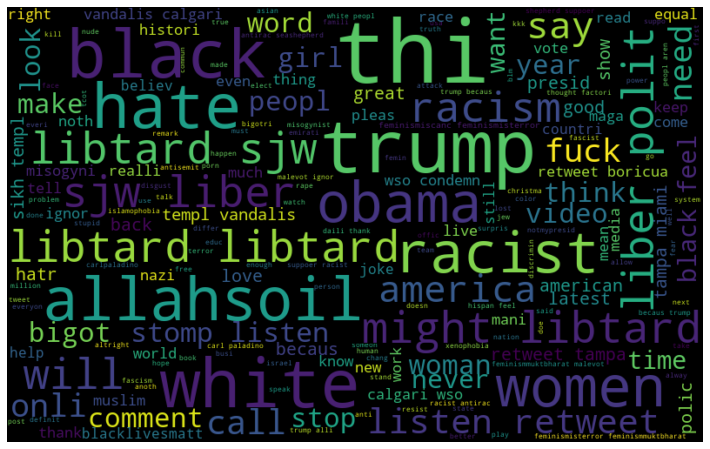

In [15]:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['positive_comments'])

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=500, test_size=0.75)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [19]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [20]:
pred = model.predict(x_test)
f1_score(y_test, pred)

0.44609665427509293

In [21]:
accuracy_score(y_test,pred)

0.9440597363590856

In [22]:
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:, 1] >= 0.3
pred = pred.astype(np.int)

f1_score(y_test, pred)

0.5225417110401136

In [23]:
accuracy_score(y_test,pred)

0.9438928750208576

In [24]:
pred_prob[0][1] >= 0.3

False